<a href="https://colab.research.google.com/github/Kostia2004/DLScompetition/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/ML\ Kaggle/advanced-dls-spring-2021.zip

Archive:  /content/drive/MyDrive/ЭэЭэЭэЭксперименты/Нейронки/ML Kaggle/advanced-dls-spring-2021.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [4]:
dataset = pd.read_csv('train.csv')
dataset

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [5]:
for column in dataset.columns:
  print(column, np.unique(np.asarray(dataset.loc[:,column])))

ClientPeriod [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
MonthlySpending [ 18.25  18.4   18.7  ... 118.6  118.65 118.75]
TotalSpent [' ' '100.2' '100.25' ... '997.65' '998.1' '999.9']
Sex ['Female' 'Male']
IsSeniorCitizen [0 1]
HasPartner ['No' 'Yes']
HasChild ['No' 'Yes']
HasPhoneService ['No' 'Yes']
HasMultiplePhoneNumbers ['No' 'No phone service' 'Yes']
HasInternetService ['DSL' 'Fiber optic' 'No']
HasOnlineSecurityService ['No' 'No internet service' 'Yes']
HasOnlineBackup ['No' 'No internet service' 'Yes']
HasDeviceProtection ['No' 'No internet service' 'Yes']
HasTechSupportAccess ['No' 'No internet service' 'Yes']
HasOnlineTV ['No' 'No internet service' 'Yes']
HasMovieSubscription ['No' 'No internet service' 'Yes']
HasContractPhone ['Month-to-month' 'One year' 'Two year']
IsBillingPaperless ['No' 'Yes']


In [6]:
def normalyze(dataset):
  dataset = dataset.drop(dataset[dataset['TotalSpent'].isin([' '])].index, axis=0)
  dataset = dataset.replace('No internet service', 'No')
  dataset = dataset.replace('No phone service', 'No')
  dataset['Sex'] = pd.factorize(dataset['Sex'])[0]
  dataset['HasPartner'] = pd.factorize(dataset['HasPartner'])[0]
  dataset['HasChild'] = pd.factorize(dataset['HasChild'])[0]
  dataset['HasPhoneService'] = pd.factorize(dataset['HasPhoneService'])[0]
  dataset['HasMultiplePhoneNumbers'] = pd.factorize(dataset['HasMultiplePhoneNumbers'])[0]
  dataset['HasInternetService'] = pd.factorize(dataset['HasInternetService'])[0]
  dataset['HasOnlineSecurityService'] = pd.factorize(dataset['HasOnlineSecurityService'])[0]
  dataset['HasOnlineBackup'] = pd.factorize(dataset['HasOnlineBackup'])[0]
  dataset['HasDeviceProtection'] = pd.factorize(dataset['HasDeviceProtection'])[0]
  dataset['HasTechSupportAccess'] = pd.factorize(dataset['HasTechSupportAccess'])[0]
  dataset['HasOnlineTV'] = pd.factorize(dataset['HasOnlineTV'])[0]
  dataset['HasMovieSubscription'] = pd.factorize(dataset['HasMovieSubscription'])[0]
  dataset['HasContractPhone'] = pd.factorize(dataset['HasContractPhone'])[0]
  dataset['IsBillingPaperless'] = pd.factorize(dataset['IsBillingPaperless'])[0]
  dataset['PaymentMethod'] = pd.factorize(dataset['PaymentMethod'])[0]
  return dataset

In [7]:
dataset = normalyze(dataset)
dataset

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,72,25.85,1872.2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
2,1,75.90,75.9,0,0,1,1,0,0,1,0,0,0,1,0,0,2,1,2,1
3,32,79.30,2570,1,1,0,1,0,1,1,0,0,1,0,0,0,2,0,0,0
4,60,115.25,6758.45,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,1,1,1,0,2,0,0,0,1,0,0,2,0,2,0
5278,50,44.45,2188.45,0,0,0,1,1,0,2,1,0,0,1,1,0,0,1,3,0
5279,1,55.05,55.05,0,0,1,1,0,0,2,0,0,1,1,0,0,2,0,0,0
5280,29,76.00,2215.25,1,0,1,1,0,1,1,0,0,0,0,0,0,2,1,1,0


In [8]:
X_columns = dataset.columns[:-1]
Y_columns = ['Churn']

In [9]:
x = dataset[X_columns]
y = dataset[Y_columns]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=17)

#Tree

##Train tree classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
tree.get_depth()

23

###Tree parameters setup

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [14]:
tree_params = {'max_depth': range(1,20),
'max_features': range(2,19)}

In [15]:
tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [16]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 323 candidates, totalling 1615 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'max_features': range(2, 19)},
             verbose=True)

In [17]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 4, 'max_features': 13}, 0.7884059246546459)

##Test tree classifier

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)
tree_roc =  roc_auc_score(y_test, tree_pred)
tree_precision =  precision_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)
print('accuracy:', tree_acc) 
print('roc_auc:', tree_roc)
print('precision:', tree_precision)
print('recall:', tree_recall) 

accuracy: 0.7326169405815424
roc_auc: 0.6546661437649355
precision: 0.45990566037735847
recall: 0.5012853470437018


In [19]:
treegrid_acc = accuracy_score(y_test, tree_grid.predict(x_test))
treegrid_roc = roc_auc_score(y_test, tree_grid.predict(x_test))
treegrid_precision = precision_score(y_test, tree_grid.predict(x_test))
treegrid_recall = recall_score(y_test, tree_grid.predict(x_test))
print('accuracy:', treegrid_acc) #(TP+TN)/(TP+TN+FP+FN)
print('roc_auc:', treegrid_roc)
print('precision:', treegrid_precision) #TP/(TP+FP)
print('recall:', treegrid_recall) #TP/(TP+FN)

accuracy: 0.797724399494311
roc_auc: 0.682242386500516
precision: 0.6210526315789474
recall: 0.455012853470437


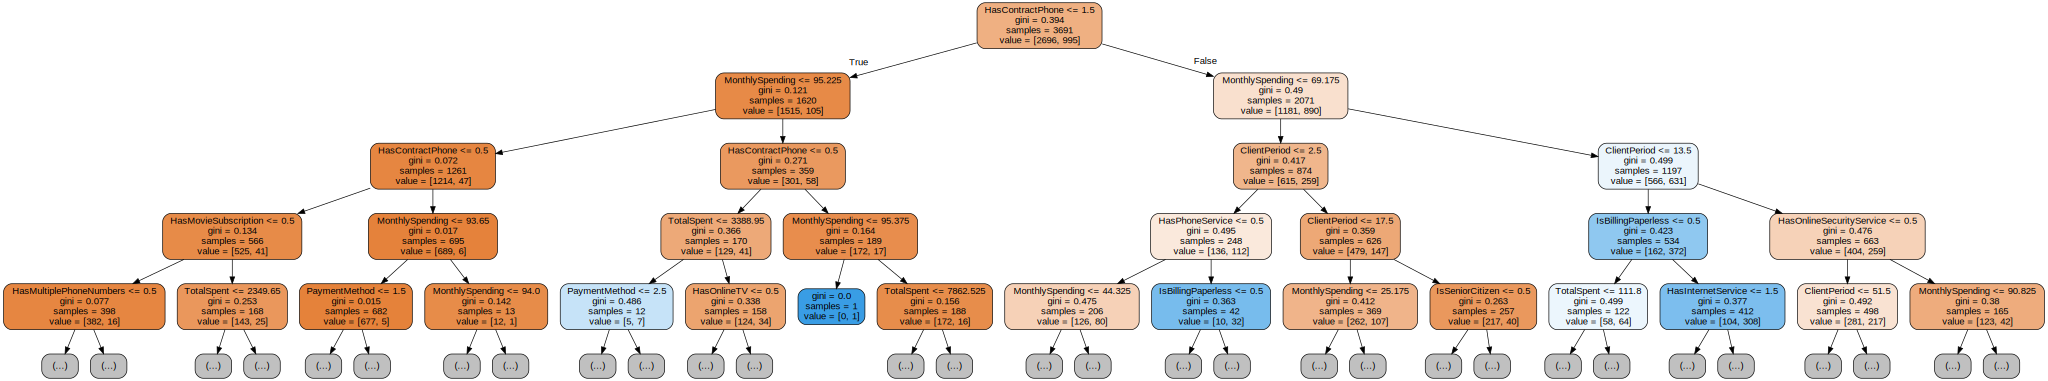

In [20]:
from sklearn.tree import export_graphviz
import graphviz

graph = export_graphviz(tree,
                        feature_names=X_columns,
                        max_depth = 4,
                        filled=True,
                        rounded=True)
graphviz.Source(graph)

#Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
RFclf = RandomForestClassifier()
RFclf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

##Test random forest classifer

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

rf_pred = RFclf.predict(x_test)
rf_acc = accuracy_score(y_test, tree_pred)
rf_roc =  roc_auc_score(y_test, tree_pred)
rf_precision =  precision_score(y_test, tree_pred)
rf_recall = recall_score(y_test, tree_pred)
print('accuracy:', rf_acc) 
print('roc_auc:', rf_roc)
print('precision:', rf_precision)
print('recall:', rf_recall) 

accuracy: 0.7326169405815424
roc_auc: 0.6546661437649355
precision: 0.45990566037735847
recall: 0.5012853470437018


#Logistic Regression

##Train logistic regression classifier

In [25]:
from sklearn.linear_model import LogisticRegression

LRclf = LogisticRegression()
LRclf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

##Test logistic regression classifier

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

lr_pred = LRclf.predict(x_test)
lr_acc = accuracy_score(y_test, lr_pred) 
lr_roc = roc_auc_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
print('accuracy:', lr_acc) 
print('roc_auc:', lr_roc)
print('precision:', lr_precision)
print('recall:', lr_recall) 

accuracy: 0.8109987357774968
roc_auc: 0.7230944433790082
precision: 0.6331360946745562
recall: 0.5501285347043702


#Gradient boosting classifier

##Train gradient boosting classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

##Test gradient boosting classifier

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

gb_pred = gb_clf.predict(x_test)
gb_acc = accuracy_score(y_test, gb_pred) 
gb_roc = roc_auc_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
print('accuracy:', gb_acc) 
print('roc_auc:', gb_roc)
print('precision:', gb_precision)
print('recall:', gb_recall) 

accuracy: 0.8078381795195955
roc_auc: 0.697610525839462
precision: 0.6470588235294118
recall: 0.480719794344473


#ALL MODELS

Text(0.5, 0.98, 'accuracy')

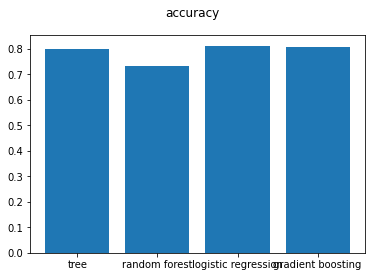

In [29]:
models = ['tree', 'random forest', 'logistic regression', 'gradient boosting']
acc = [treegrid_acc, rf_acc, lr_acc, gb_acc]
plt.bar(models, acc)
plt.suptitle('accuracy')

Text(0.5, 0.98, 'AUC ROC')

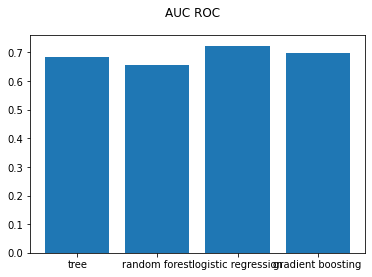

In [30]:
roc = [treegrid_roc, rf_roc, lr_roc, gb_roc]
plt.bar(models, roc)
plt.suptitle('AUC ROC')

Text(0.5, 0.98, 'precision')

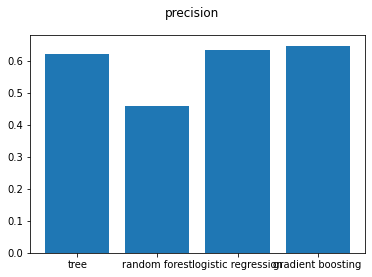

In [31]:
precision = [treegrid_precision, rf_precision, lr_precision, gb_precision]
plt.bar(models, precision)
plt.suptitle('precision')

Text(0.5, 0.98, 'recall')

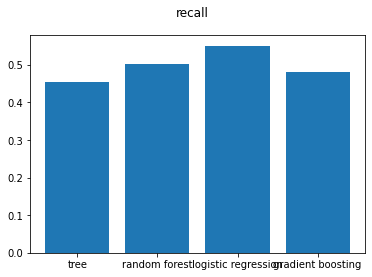

In [32]:
recall = [treegrid_recall, rf_recall, lr_recall, gb_recall]
plt.bar(models, recall)
plt.suptitle('recall')